In [1]:
import scipy
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pygmt
import math
pi = np.pi

robbins = pd.read_csv("lunar_crater_database_robbins_2018.csv")
coords_LL = robbins[['LON_CIRC_IMG','LAT_CIRC_IMG','DIAM_CIRC_IMG']]
coords_LL = coords_LL.loc[(coords_LL['DIAM_CIRC_IMG'] < 5)]

# translate into cylindrical equal area projection
def translate_lon(longitude_i):
    return np.pi * longitude_i / 180
def translate_lat(latitude_i):
    return np.sin(np.deg2rad(latitude_i))

coords_C=pd.DataFrame()
coords_C.loc[:, 'LON_CIRC_IMG'] = coords_LL.loc[:, 'LON_CIRC_IMG'].apply(translate_lon)
coords_C.loc[:, 'LAT_CIRC_IMG'] = coords_LL.loc[:, 'LAT_CIRC_IMG'].apply(translate_lat)
coords_C.loc[:, 'DIAM_CIRC_IMG'] = coords_LL.loc[:, 'DIAM_CIRC_IMG']

coords_C_num = coords_C.to_numpy()
x = coords_C_num[:,0]
y = coords_C_num[:,1]
diams = coords_C_num[:,2]


nbins=100
k = scipy.stats.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
%store xi yi zi

Stored 'xi' (ndarray)
Stored 'yi' (ndarray)
Stored 'zi' (ndarray)


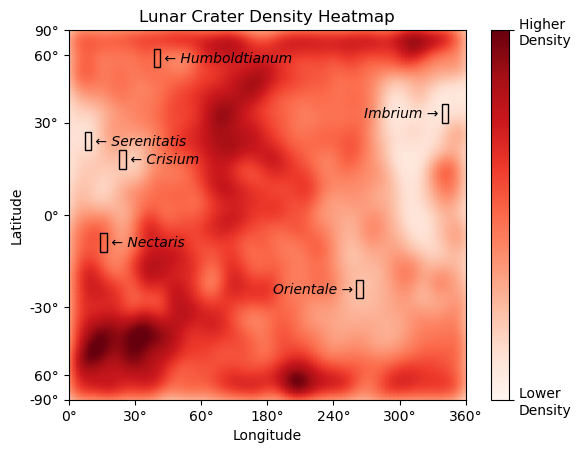

In [9]:
from matplotlib.patches import Rectangle

pi = np.pi

ax = plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.Reds, vmin=0, vmax=.15)
cbar = plt.colorbar(ticks=[0, 0.15]) # COLORBAR
cbar.ax.set_yticklabels(['Lower \nDensity', 'Higher \nDensity'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lunar Crater Density Heatmap')
plt.xticks([0,pi/3,2*pi/3,pi,4*pi/3,5*pi/3,2*pi], ['0°','30°','60°','180°','240°','300°','360°'])
plt.yticks([-1,-0.866,-.5,0,.5,0.866,1], ['-90°','60°','-30°','0°','30°','60°','90°',])

#serenitatis
plt.gca().add_patch(Rectangle((0.25,0.35),0.1,0.1, edgecolor='black', facecolor='none', lw=1))
plt.text(0.25+0.1, 0.35+0.025, " \u2190 Serenitatis", style='italic')

#nectaris
plt.gca().add_patch(Rectangle((0.5,-0.2),0.1,0.1, edgecolor='black', facecolor='none', lw=1))
plt.text(0.5+0.1, -0.2+0.025, " \u2190 Nectaris", style='italic')

#crisium
plt.gca().add_patch(Rectangle((0.8,0.25),0.1,0.1, edgecolor='black', facecolor='none', lw=1))
plt.text(0.8+0.1, 0.25+0.025, " \u2190 Crisium", style='italic')

#humboldtianum
plt.gca().add_patch(Rectangle((1.35,0.8),0.1,0.1, edgecolor='black', facecolor='none', lw=1))
plt.text(1.35+0.1, 0.8+0.025, " \u2190 Humboldtianum", style='italic')

#imbrium
plt.gca().add_patch(Rectangle((5.9,.5),0.1,0.1, edgecolor='black', facecolor='none', lw=1))
plt.text(5.9-0.05, .5+0.025, "Imbrium \u2192", style='italic', ha='right')

#orientale
plt.gca().add_patch(Rectangle((4.55,-.450),0.1,0.1, edgecolor='black', facecolor='none', lw=1))
plt.text(4.55-0.05, -.450+0.025, "Orientale \u2192", style='italic', ha='right')

plt.show()

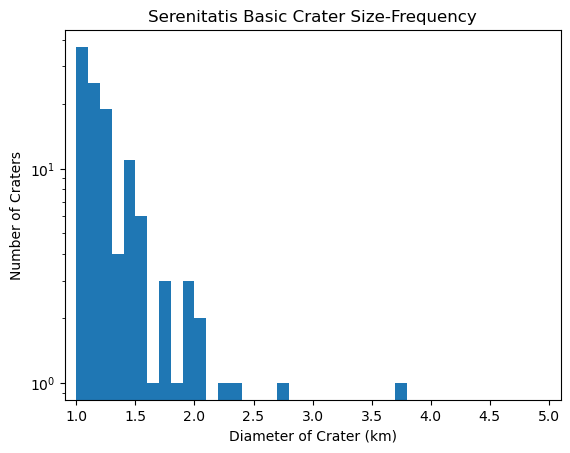

In [16]:
#serenitatis
x_min = 0.25
x_max = 0.35
y_min = 0.35
y_max = 0.45

data_seren = coords_C.loc[(coords_C['LON_CIRC_IMG'] > x_min) & (coords_C['LON_CIRC_IMG'] < x_max) & (coords_C['LAT_CIRC_IMG'] > y_min) & (coords_C['LAT_CIRC_IMG'] < y_max)]
diams_seren = data_seren[['DIAM_CIRC_IMG']]

fig, ax = plt.subplots()
ax.hist(diams_seren, bins=np.arange(0, 5, 5/50))
plt.yscale('log')
plt.xlabel('Diameter of Crater (km)')
plt.ylabel('Number of Craters')
plt.title('Serenitatis Basic Crater Size-Frequency')
plt.xlim(.9,5.1)
plt.show()

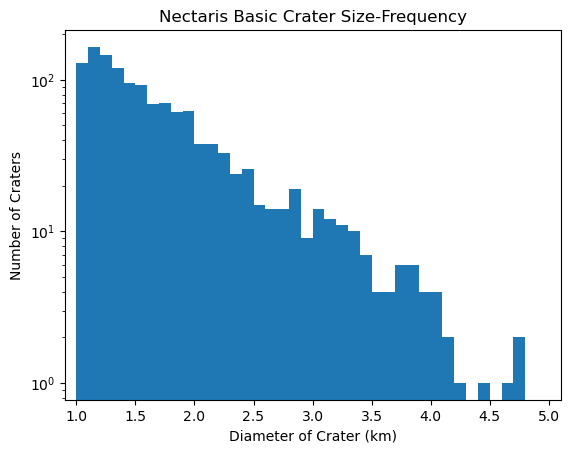

In [17]:
#nectaris
x_min = 0.5
x_max = 0.6
y_min = -0.2
y_max = -0.1

data_seren = coords_C.loc[(coords_C['LON_CIRC_IMG'] > x_min) & (coords_C['LON_CIRC_IMG'] < x_max) & (coords_C['LAT_CIRC_IMG'] > y_min) & (coords_C['LAT_CIRC_IMG'] < y_max)]
diams_seren = data_seren[['DIAM_CIRC_IMG']]

fig, ax = plt.subplots()
ax.hist(diams_seren, bins=np.arange(0, 5, 5/50))
plt.yscale('log')
plt.xlabel('Diameter of Crater (km)')
plt.ylabel('Number of Craters')
plt.title('Nectaris Basic Crater Size-Frequency')
plt.xlim(.9,5.1)
plt.show()

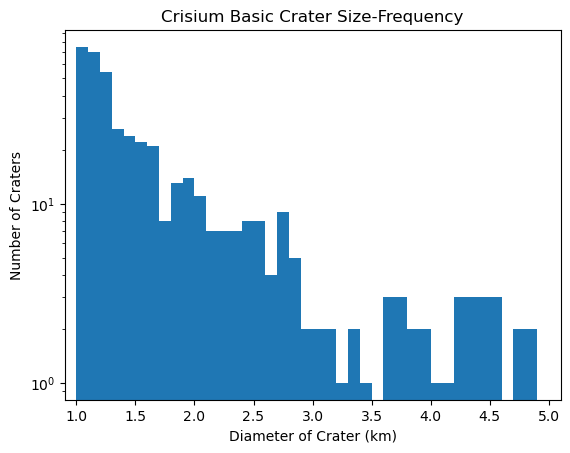

In [18]:
#crisium
x_min = 0.8
x_max = 0.9
y_min = 0.25
y_max = 0.35

data_seren = coords_C.loc[(coords_C['LON_CIRC_IMG'] > x_min) & (coords_C['LON_CIRC_IMG'] < x_max) & (coords_C['LAT_CIRC_IMG'] > y_min) & (coords_C['LAT_CIRC_IMG'] < y_max)]
diams_seren = data_seren[['DIAM_CIRC_IMG']]

fig, ax = plt.subplots()
ax.hist(diams_seren, bins=np.arange(0, 5, 5/50))
plt.yscale('log')
plt.xlabel('Diameter of Crater (km)')
plt.ylabel('Number of Craters')
plt.title('Crisium Basic Crater Size-Frequency')
plt.xlim(.9,5.1)
plt.show()

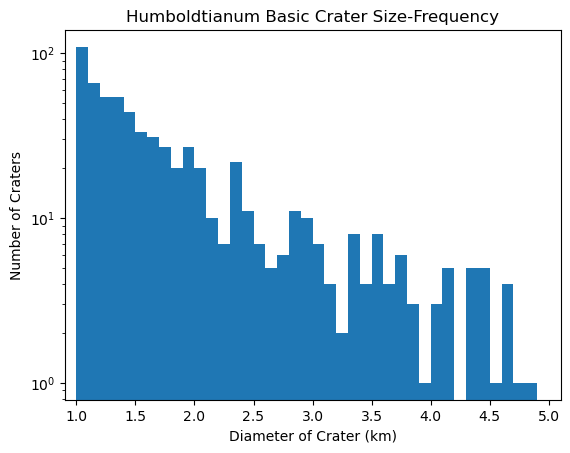

In [19]:
#Humboldtianum
x_min = 1.35
x_max = 1.45
y_min = 0.8
y_max = 0.9

data_seren = coords_C.loc[(coords_C['LON_CIRC_IMG'] > x_min) & (coords_C['LON_CIRC_IMG'] < x_max) & (coords_C['LAT_CIRC_IMG'] > y_min) & (coords_C['LAT_CIRC_IMG'] < y_max)]
diams_seren = data_seren[['DIAM_CIRC_IMG']]

fig, ax = plt.subplots()
ax.hist(diams_seren, bins=np.arange(0, 5, 5/50))
plt.yscale('log')
plt.xlabel('Diameter of Crater (km)')
plt.ylabel('Number of Craters')
plt.title('Humboldtianum Basic Crater Size-Frequency')
plt.xlim(.9,5.1)
plt.show()

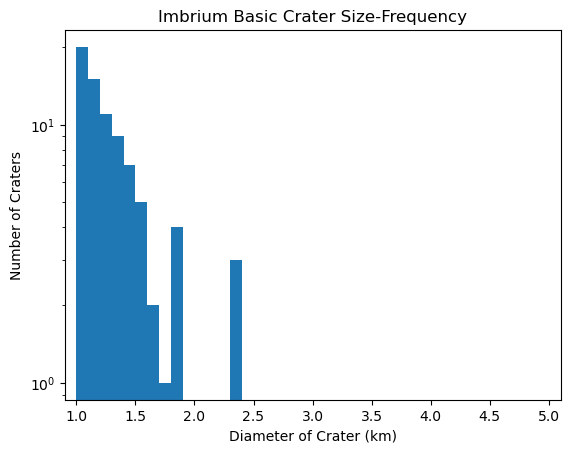

In [20]:
#Imbrium
x_min = 5.9
x_max = 6.0
y_min = 0.5
y_max = 0.6

data_seren = coords_C.loc[(coords_C['LON_CIRC_IMG'] > x_min) & (coords_C['LON_CIRC_IMG'] < x_max) & (coords_C['LAT_CIRC_IMG'] > y_min) & (coords_C['LAT_CIRC_IMG'] < y_max)]
diams_seren = data_seren[['DIAM_CIRC_IMG']]

fig, ax = plt.subplots()
ax.hist(diams_seren, bins=np.arange(0, 5, 5/50))
plt.yscale('log')
plt.xlabel('Diameter of Crater (km)')
plt.ylabel('Number of Craters')
plt.title('Imbrium Basic Crater Size-Frequency')
plt.xlim(.9,5.1)
plt.show()

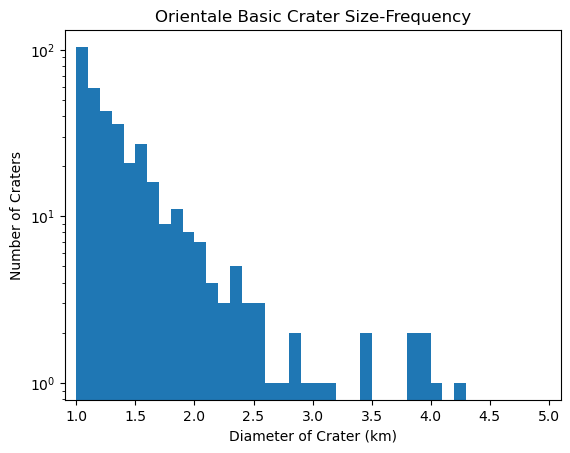

In [21]:
#orientale
x_min = 4.55
x_max = 4.65
y_min = -0.45
y_max = -0.35

data_seren = coords_C.loc[(coords_C['LON_CIRC_IMG'] > x_min) & (coords_C['LON_CIRC_IMG'] < x_max) & (coords_C['LAT_CIRC_IMG'] > y_min) & (coords_C['LAT_CIRC_IMG'] < y_max)]
diams_seren = data_seren[['DIAM_CIRC_IMG']]

fig, ax = plt.subplots()
ax.hist(diams_seren, bins=np.arange(0, 5, 5/50))
plt.yscale('log')
plt.xlabel('Diameter of Crater (km)')
plt.ylabel('Number of Craters')
plt.title('Orientale Basic Crater Size-Frequency')
plt.xlim(.9,5.1)
plt.show()